In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

## 原始數據

In [2]:
y = [33, 56 , 87, 104, 160 ,183, 133, 216, 281, 382, 384, 442, 431, 439, 551, 744, 874, 1209, 1199, 1210, 1390, 1626, 2386, 2969, 3766, 4126, 5172, 5221, 6339, 8923, 11517, 12313, 15033, 17085, 17858, 23139, 28460, 30035, 36168, 46377, 44294]
n = len(y)
x = [*range(n)]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

40天前 [33]
39天前 [56]
38天前 [87]
37天前 [104]
36天前 [160]
35天前 [183]
34天前 [133]
33天前 [216]
32天前 [281]
31天前 [382]
30天前 [384]
29天前 [442]
28天前 [431]
27天前 [439]
26天前 [551]
25天前 [744]
24天前 [874]
23天前 [1209]
22天前 [1199]
21天前 [1210]
20天前 [1390]
19天前 [1626]
18天前 [2386]
17天前 [2969]
16天前 [3766]
15天前 [4126]
14天前 [5172]
13天前 [5221]
12天前 [6339]
11天前 [8923]
10天前 [11517]
9天前 [12313]
8天前 [15033]
7天前 [17085]
6天前 [17858]
5天前 [23139]
4天前 [28460]
3天前 [30035]
2天前 [36168]
1天前 [46377]
0天前 [44294]


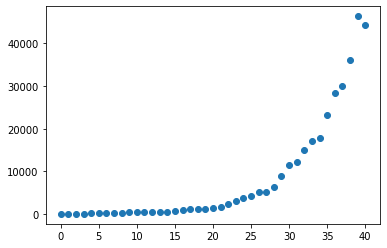

In [3]:
print(*[f'{n-i-1}天前 {y[i]}' for i in range(n)], sep='\n')
plt.scatter(x, y)

## 使用多項式回歸

### degree = 5

array([[ 53854.68536919],
       [ 60993.51600346],
       [ 68838.80207365],
       [ 77436.35654262],
       [ 86833.47815404],
       [ 97078.95598798],
       [108223.07401646],
       [120317.61565894],
       [133415.86833798],
       [147572.62803468],
       [162844.20384433],
       [179288.42253188],
       [196964.63308756],
       [215933.71128239],
       [236258.06422376],
       [258001.63491096],
       [281229.90679074],
       [306009.90831288],
       [332410.2174857 ],
       [360500.96643168]])

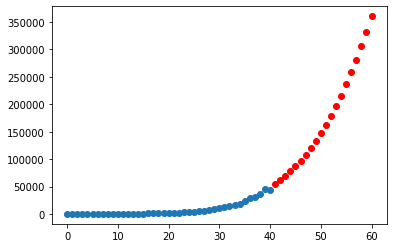

In [4]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model2.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)

## degree = 4

array([[ 53829.90543871],
       [ 60951.03612321],
       [ 68772.85946934],
       [ 77340.1406628 ],
       [ 86699.02589242],
       [ 96897.04235014],
       [107983.09823103],
       [120007.48273324],
       [133021.86605808],
       [147079.29940995],
       [162234.21499637],
       [178542.42602796],
       [196061.12671848],
       [214848.8922848 ],
       [234965.67894689],
       [256472.82392785],
       [279433.04545389],
       [303910.44275433],
       [329970.49606162],
       [357680.0666113 ],
       [387107.39664206],
       [418322.10939568],
       [451395.20911705],
       [486399.0810542 ],
       [523407.49145825],
       [562495.58758346],
       [603739.89768718],
       [647218.3310299 ],
       [693010.1778752 ],
       [741196.10948979]])

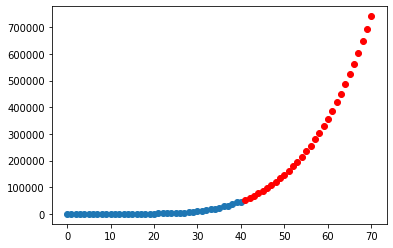

In [5]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly, y)

nx = np.array([*range(n, n+30)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model3.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)